In [1]:
import numpy as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
import sklearn as sl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import plotly.io as pio
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pio.renderers.default = "svg"

In [2]:


ev_data=pd.read_csv("charge.csv")
ev_data1=pd.read_csv("chargingfacility.csv")
ev_data2=pd.read_csv("EV_CARS _INDIA.csv")
ev_data3=pd.read_csv("total.csv")
#for unicode file(UnicodeDecodeError):
ev_data4 = pd.read_csv('chargingstation.csv', header= 0,
                        encoding= 'unicode_escape')
ev_data5=pd.read_csv("salesofEV.csv")

In [3]:
ev_data.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [4]:
ev_data1.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [5]:
ev_data2.head()

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.4,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.4,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.0,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.2,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.0,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14


In [6]:
ev_data3.head(10)

,Sl. No.,State/UT,Total Number of active Vehicle as on 08.12.2021,Total number of active Electric Vehicles as on 08.12.2021
0,1,Andaman and Nicobar Island,143529,157
1,2,Arunachal Pradesh,235189,20
2,3,Assam,4445227,43707
3,4,Bihar,9816784,58655
4,5,Chandigarh,720272,1791
5,6,Chhattisgarh,6575832,11998
6,7,Delhi,12496058,126111
7,8,Goa,1036568,1315
8,9,Gujarat,19780771,13270
9,10,Haryana,10437108,24379


In [7]:
ev_data3.describe()

,Total Number of active Vehicle as on 08.12.2021,Total number of active Electric Vehicles as on 08.12.2021
count,3.300000e+01,33.000000
mean,1.657027e+07,53158.606061
std,4.723884e+07,156137.972943
min,3.466500e+04,6.000000
25%,4.610630e+05,519.000000
50%,4.445227e+06,10001.000000
75%,1.360083e+07,43707.000000
max,2.734094e+08,877117.000000


In [8]:
ev_data3.isnull().sum()

Sl. No.                                                      0
State/UT                                                     0
Total Number of active Vehicle as on 08.12.2021              0
Total number of active Electric Vehicles as on 08.12.2021    0
dtype: int64

# no missing value

In [9]:
ev_data4.head()

,Sl. No,Category,Expressways/Highways,EV Charging Stations Sanctioned
0,1,Expressways,Mumbai - Pune,10
1,2,Expressways,Ahmadabad - Vadodara,10
2,3,Expressways,Delhi Agra Yamuna,20
3,4,Expressways,Bengaluru Mysore,14
4,5,Expressways,Bangaluru-Chennai,30


In [10]:
ev_data5.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


<AxesSubplot:>

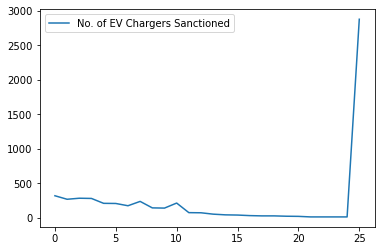

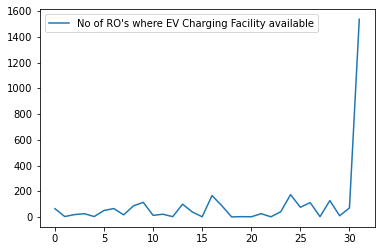

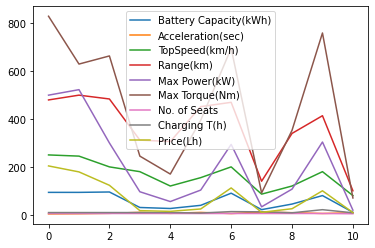

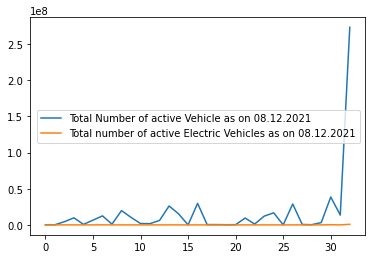

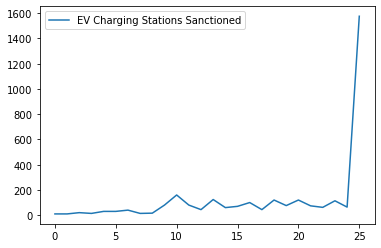

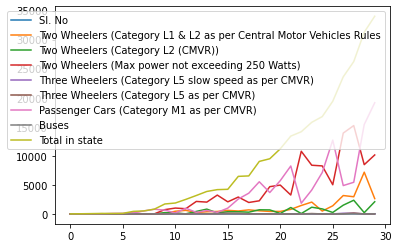

In [11]:
ev_data.plot()
ev_data1.plot()
ev_data2.plot()
ev_data3.plot()
ev_data4.plot()
ev_data5.plot()

# Psychographic Analysis

array([[<AxesSubplot:title={'center':'Sl. No'}>,
        <AxesSubplot:title={'center':'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'}>,
        <AxesSubplot:title={'center':'Two Wheelers (Category L2 (CMVR))'}>],
       [<AxesSubplot:title={'center':'Two Wheelers (Max power not exceeding 250 Watts)'}>,
        <AxesSubplot:title={'center':'Three Wheelers (Category L5 slow speed as per CMVR)'}>,
        <AxesSubplot:title={'center':'Three Wheelers (Category L5 as per CMVR)'}>],
       [<AxesSubplot:title={'center':'Passenger Cars (Category M1 as per CMVR)'}>,
        <AxesSubplot:title={'center':'Buses'}>,
        <AxesSubplot:title={'center':'Total in state'}>]], dtype=object)

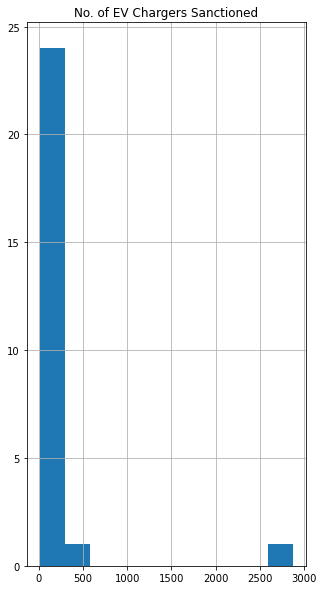

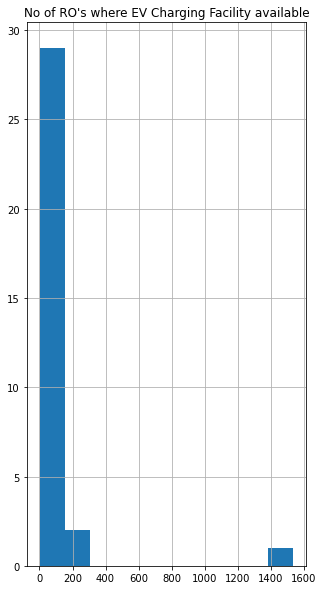

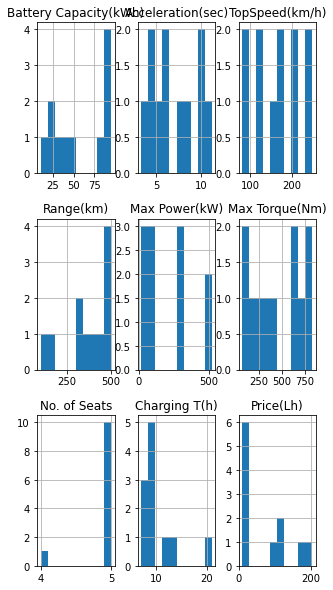

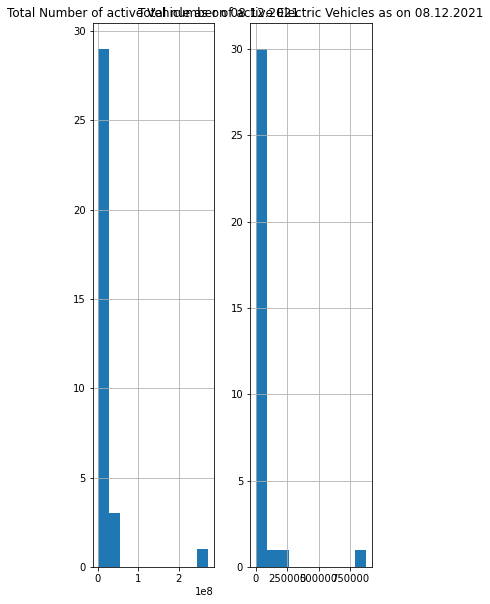

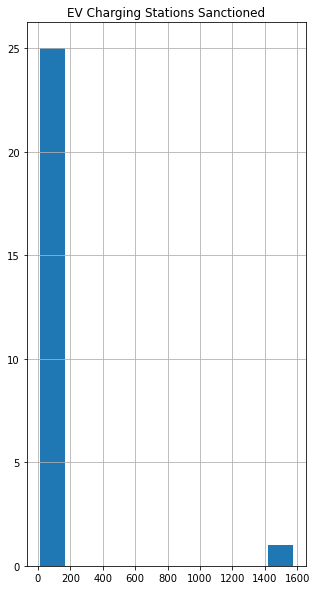

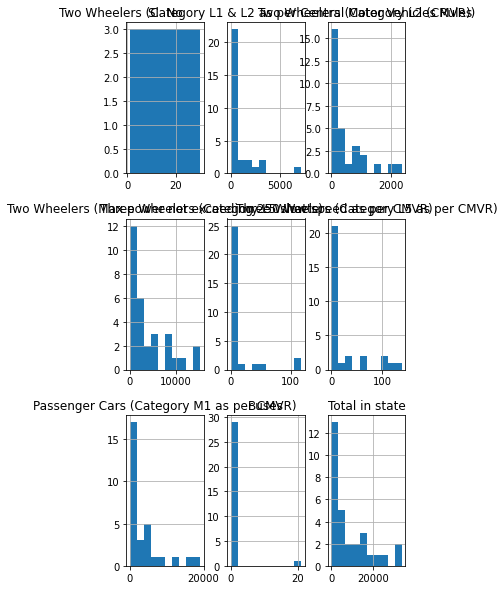

In [12]:
ev_data.hist(figsize=(5,10))
ev_data1.hist(figsize=(5,10))
ev_data2.hist(figsize=(5,10))
ev_data3.hist(figsize=(5,10))
ev_data4.hist(figsize=(5,10))
ev_data5.hist(figsize=(5,10))

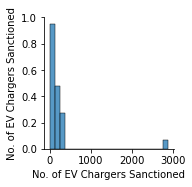

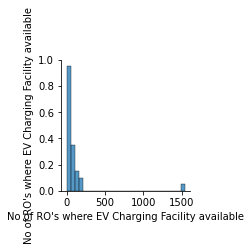

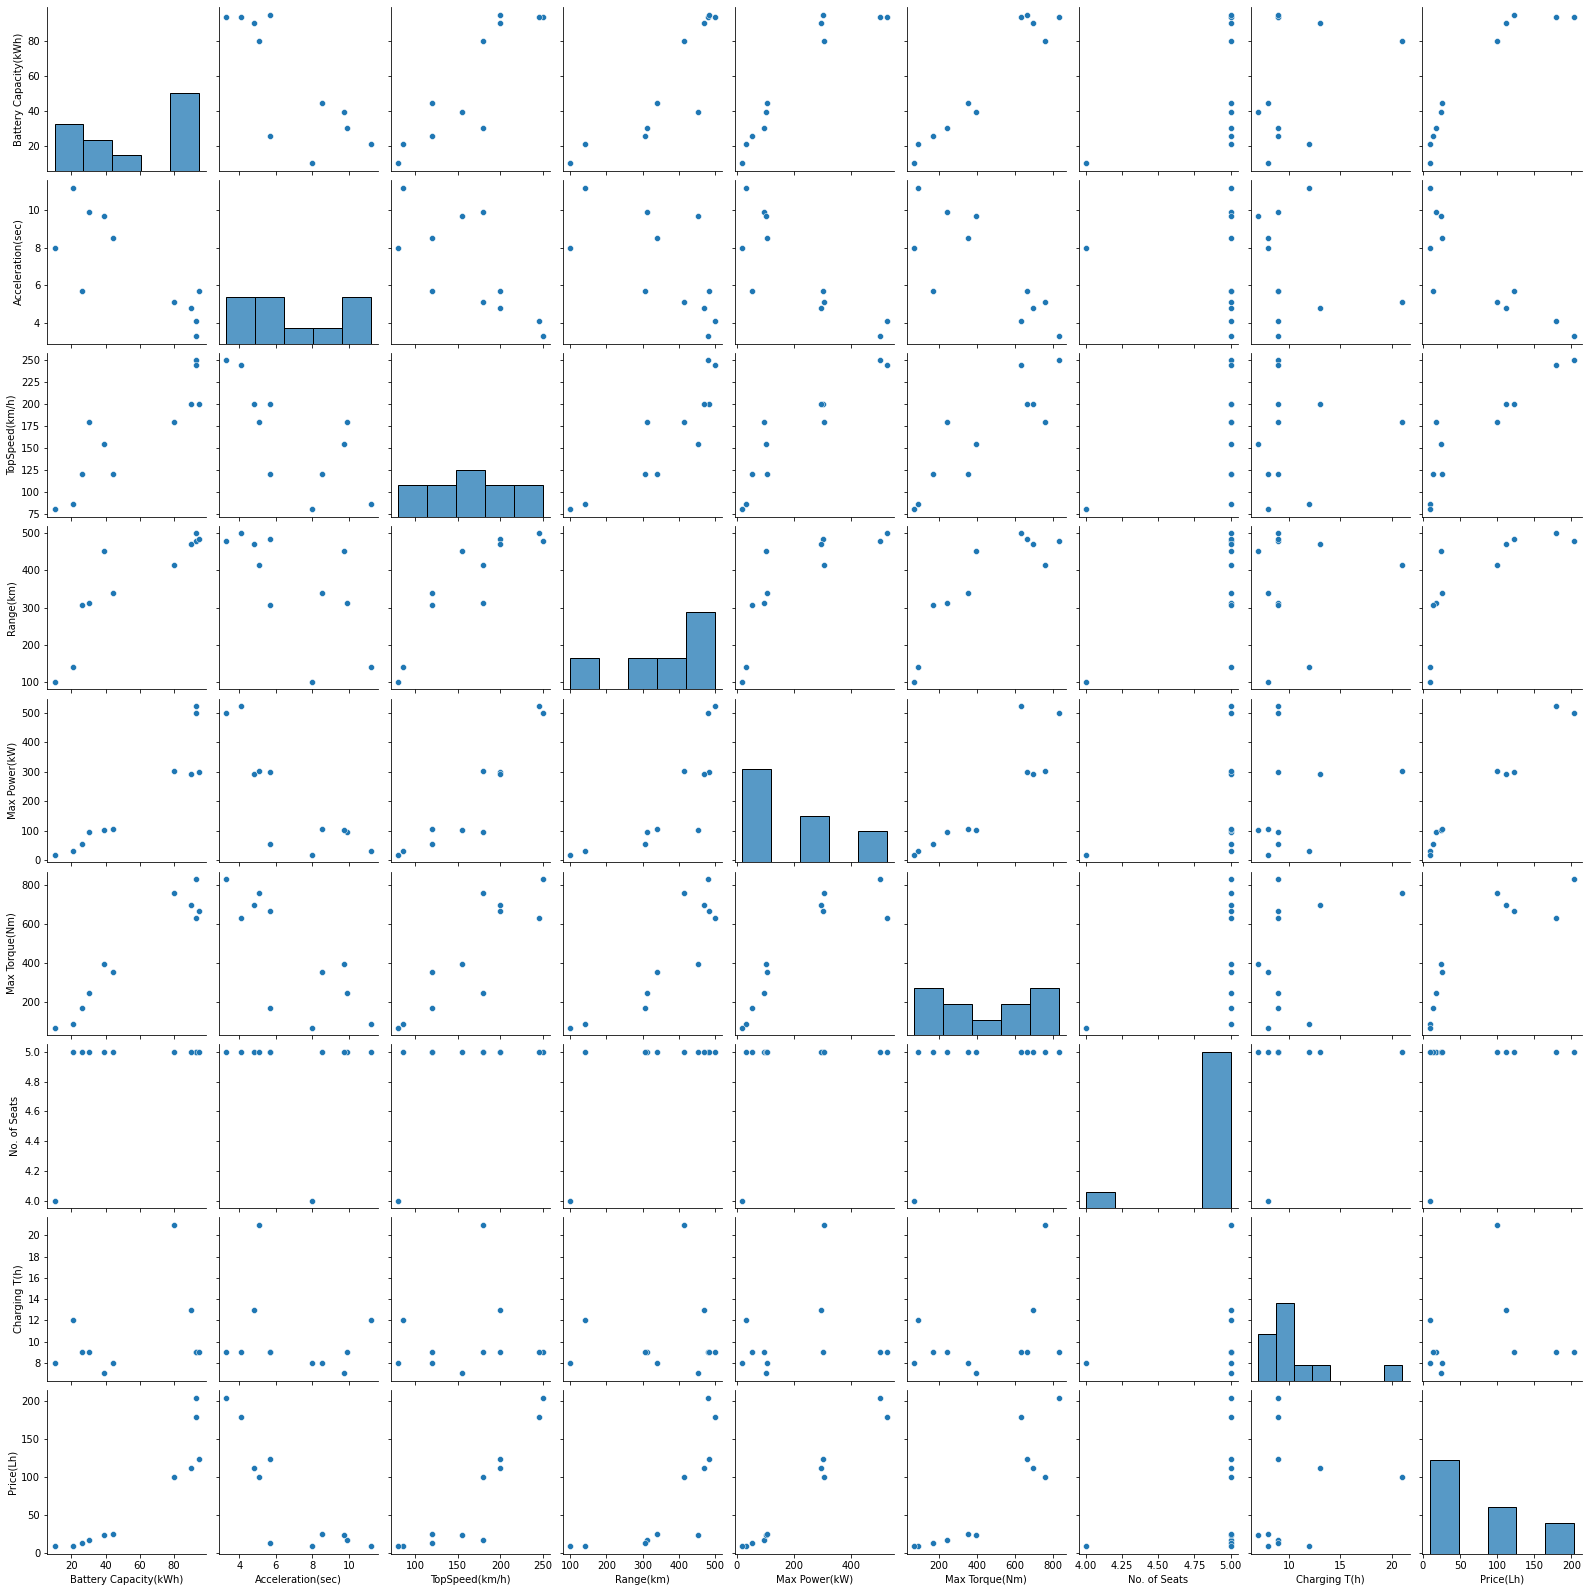

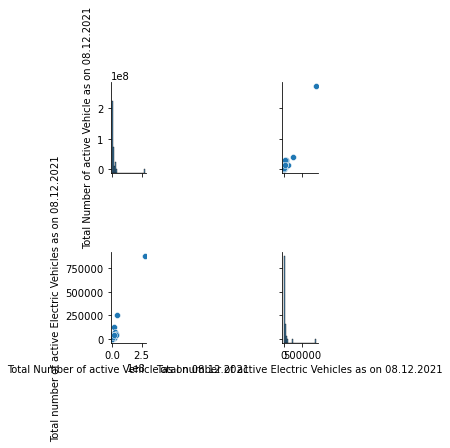

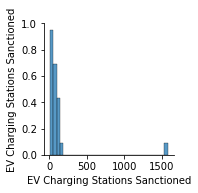

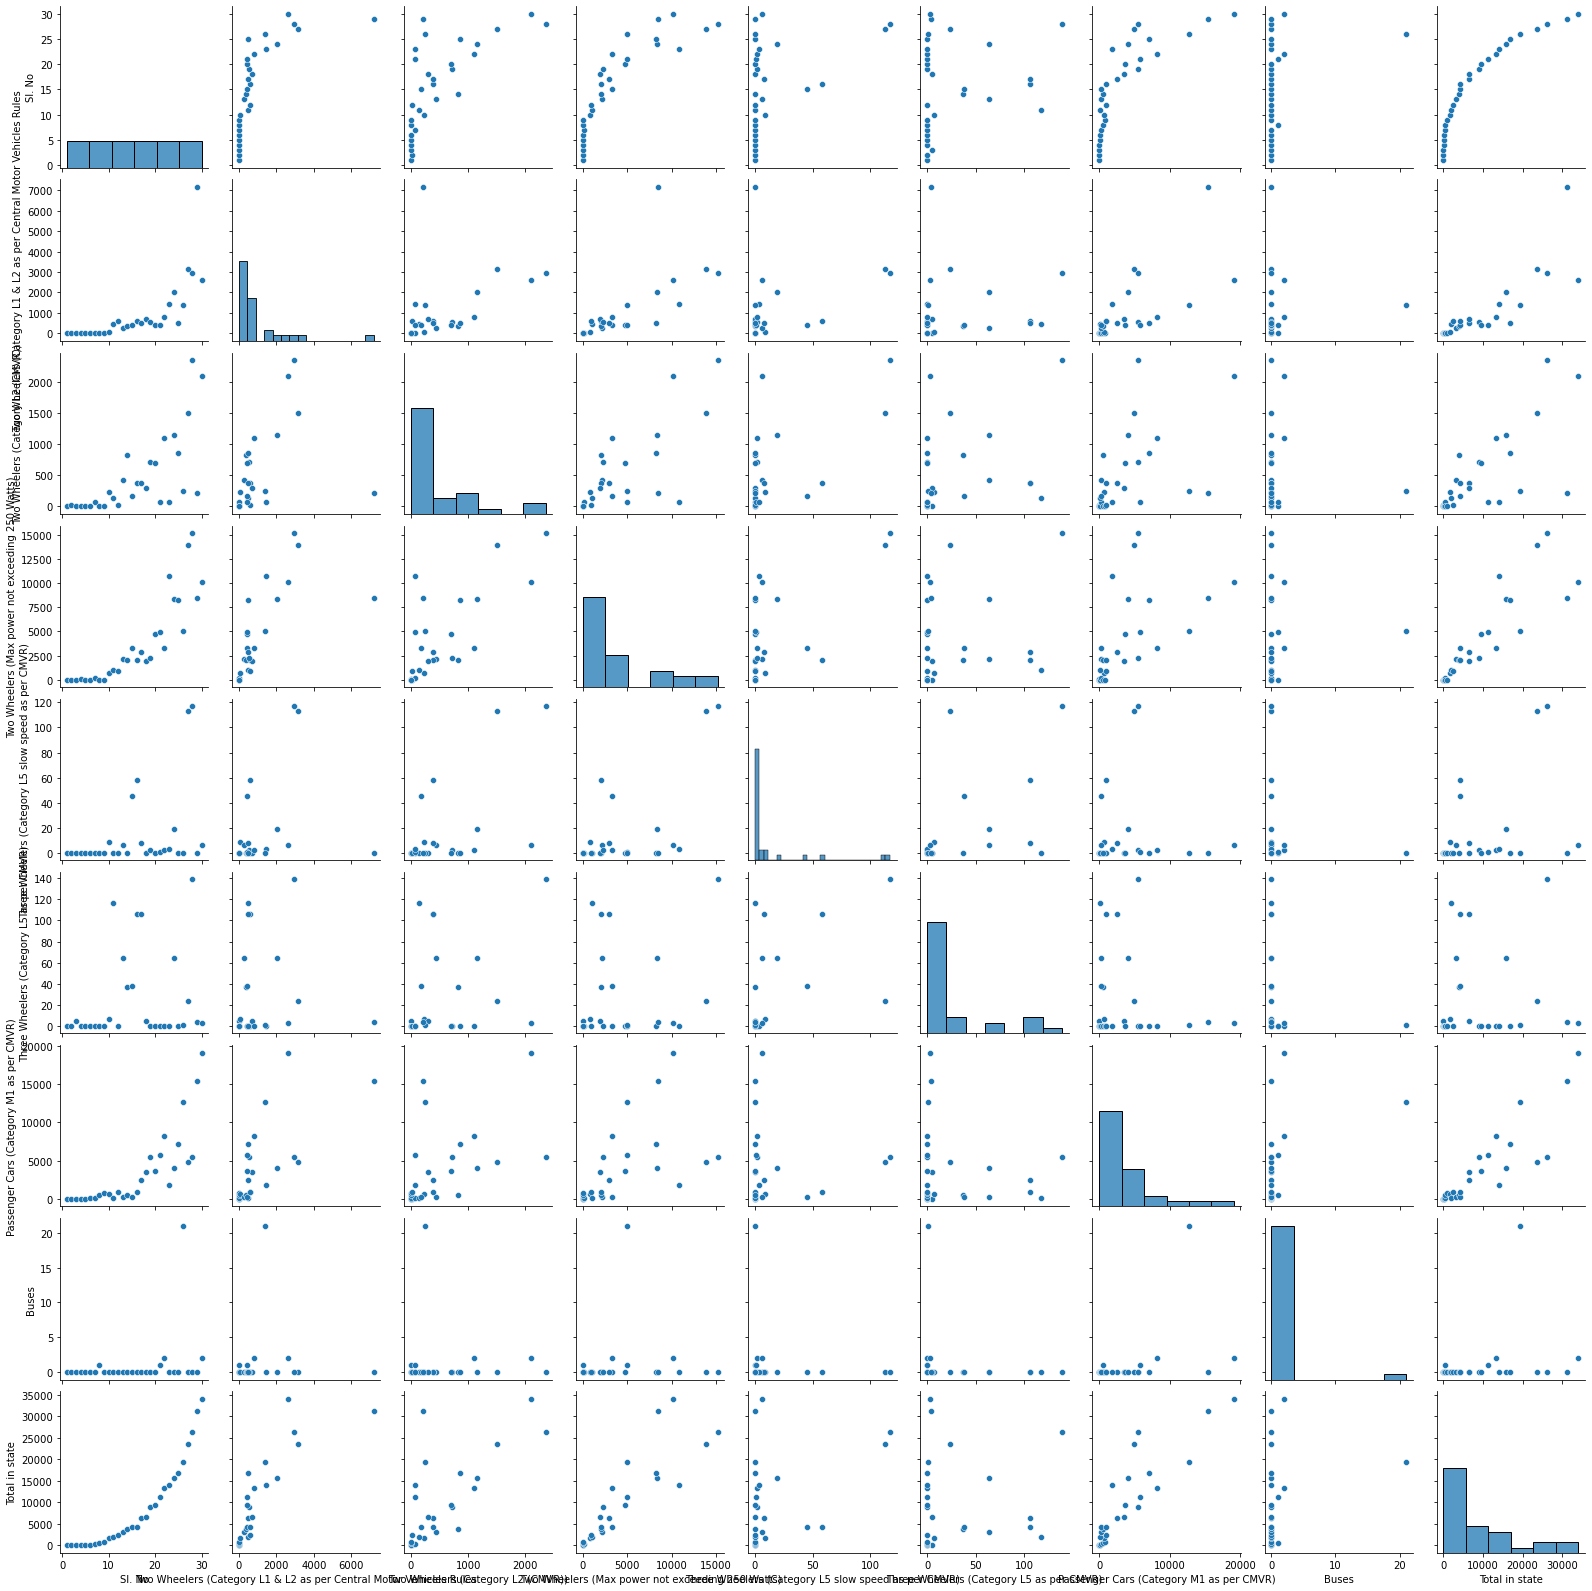

In [13]:
sns.pairplot(ev_data)
sns.pairplot(ev_data1)
sns.pairplot(ev_data2)
sns.pairplot(ev_data3)
sns.pairplot(ev_data4)
sns.pairplot(ev_data5)

<AxesSubplot:>

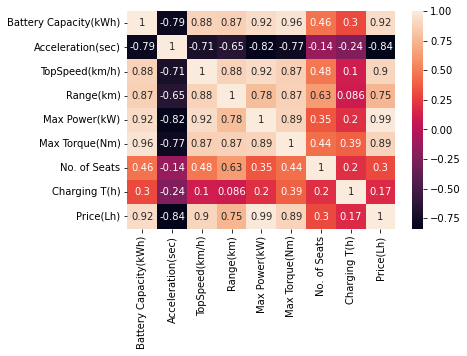

In [14]:
sns.heatmap(ev_data2.corr(),annot=True)

<AxesSubplot:>

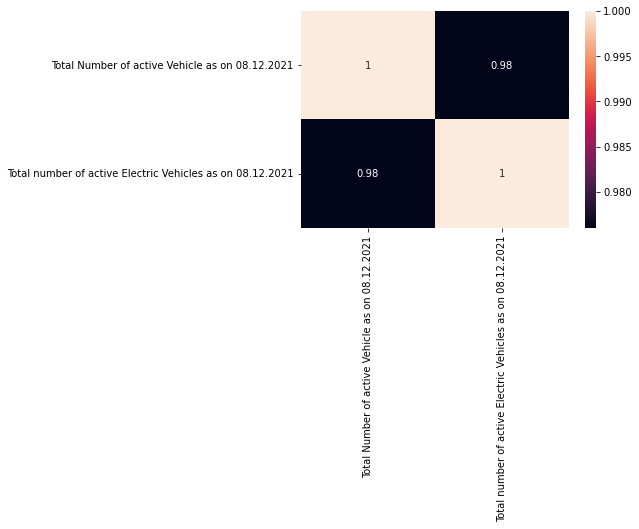

In [15]:
sns.heatmap(ev_data3.corr(),annot=True)

<AxesSubplot:>

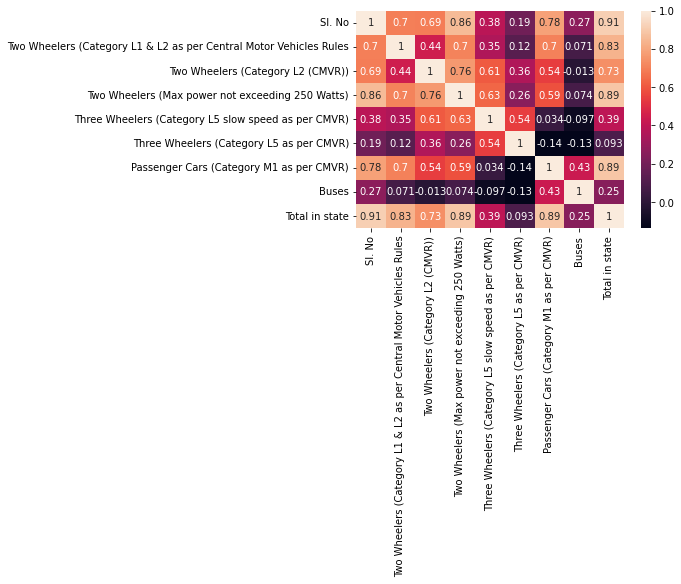

In [16]:
sns.heatmap(ev_data5.corr(),annot=True)

In [17]:
ev_data['No. of EV Chargers Sanctioned'].std()

551.4748058963904

In [18]:
ev_data['No. of EV Chargers Sanctioned'].mean()

221.30769230769232

# Data visualization

In [19]:
%pip install kaleido
import kaleido


Note: you may need to restart the kernel to use updated packages.


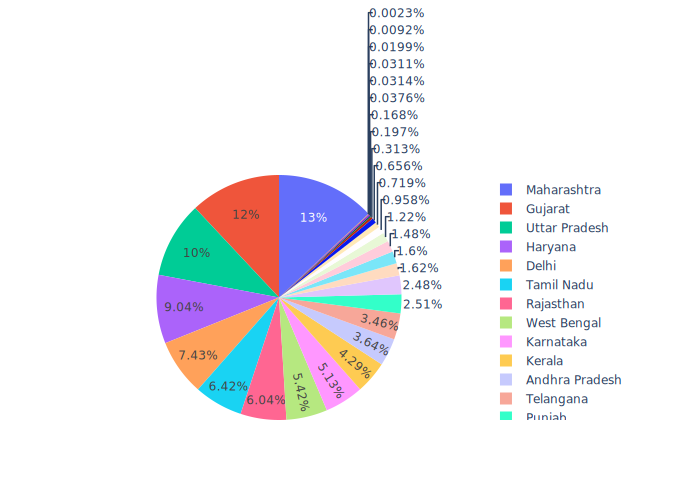

In [20]:
fig = px.pie(ev_data5,names = 'State',values = 'Total in state')
pio.show(fig)

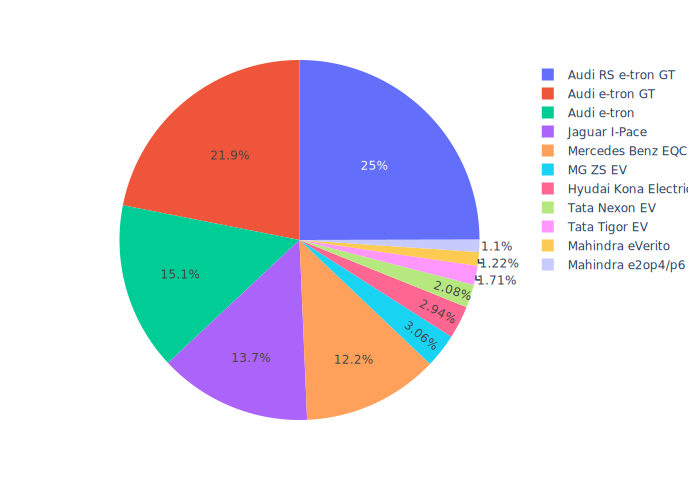

In [21]:
fig = px.pie(ev_data2,names = 'Brand Name',values = 'Price(Lh)')
pio.show(fig)

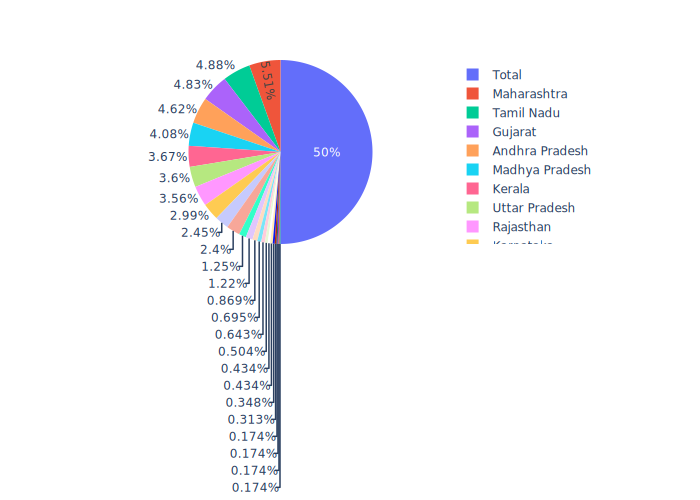

In [23]:
fig = px.pie(ev_data,names = 'State/UT',values = 'No. of EV Chargers Sanctioned')
pio.show(fig)

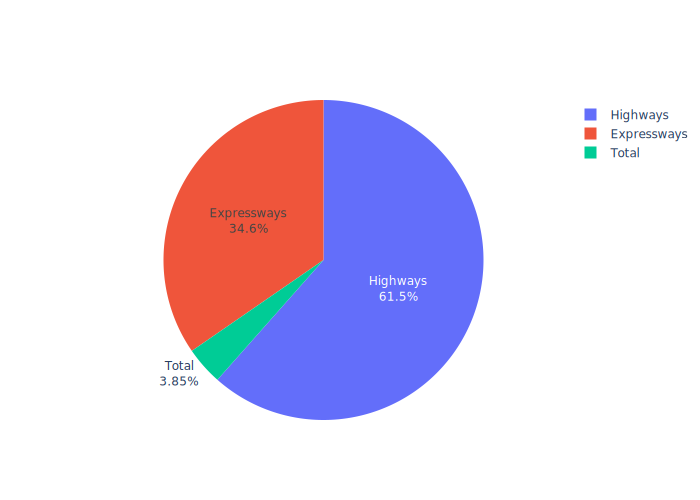

In [24]:
labels = ev_data4["Category"].value_counts()[:].index
values = ev_data4["Category"].value_counts()[:].values

colors=ev_data4["Category"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
X= ev_data1.iloc[:, [1,1]].values
wcss=[]


for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\Saurabh Decuments\new\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



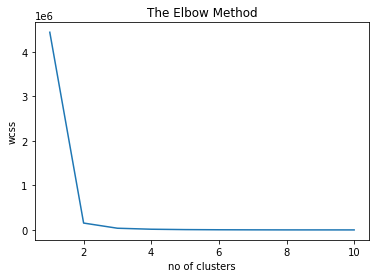

In [27]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [29]:
y = kmeans.predict(X)
y_df = pd.DataFrame(y,columns=['Total in state'])

In [30]:
print(kmeans.cluster_centers_)

[[   2.66666667    2.66666667]
 [1536.         1536.        ]
 [  69.5          69.5       ]
 [ 170.5         170.5       ]
 [ 108.66666667  108.66666667]
 [  24.66666667   24.66666667]
 [  87.5          87.5       ]
 [  43.66666667   43.66666667]
 [ 128.          128.        ]
 [  14.75         14.75      ]]


In [31]:
final_data = pd.concat([ev_data5,y_df],axis=1) 
final_data

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Total in state
0,1.0,Meghalaya,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,2
1,2.0,Nagaland,0.0,20.0,3.0,0.0,0.0,1.0,0.0,24.0,0
2,3.0,Manipur,16.0,8.0,11.0,0.0,5.0,12.0,0.0,52.0,9
3,4.0,Tripura,28.0,9.0,36.0,0.0,0.0,8.0,0.0,81.0,5
4,5.0,Andaman & Nicobar islands,0.0,0.0,0.0,0.0,0.0,82.0,0.0,82.0,0
5,6.0,Himachal Pradesh,0.0,0.0,0.0,0.0,0.0,98.0,0.0,98.0,7
6,7.0,Jammu & Kashmir,2.0,76.0,152.0,0.0,0.0,208.0,0.0,438.0,2
7,8.0,Goa,0.0,0.0,0.0,0.0,0.0,513.0,1.0,514.0,9
8,9.0,Dadra and Nagar Haveli,4.0,0.0,9.0,0.0,0.0,803.0,0.0,816.0,6
9,10.0,Jharkhand,75.0,228.0,736.0,9.0,7.0,655.0,0.0,1710.0,4


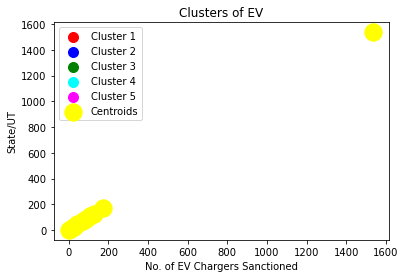

In [32]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of EV')
plt.xlabel('No. of EV Chargers Sanctioned')
plt.ylabel('State/UT')
plt.legend()
plt.show()

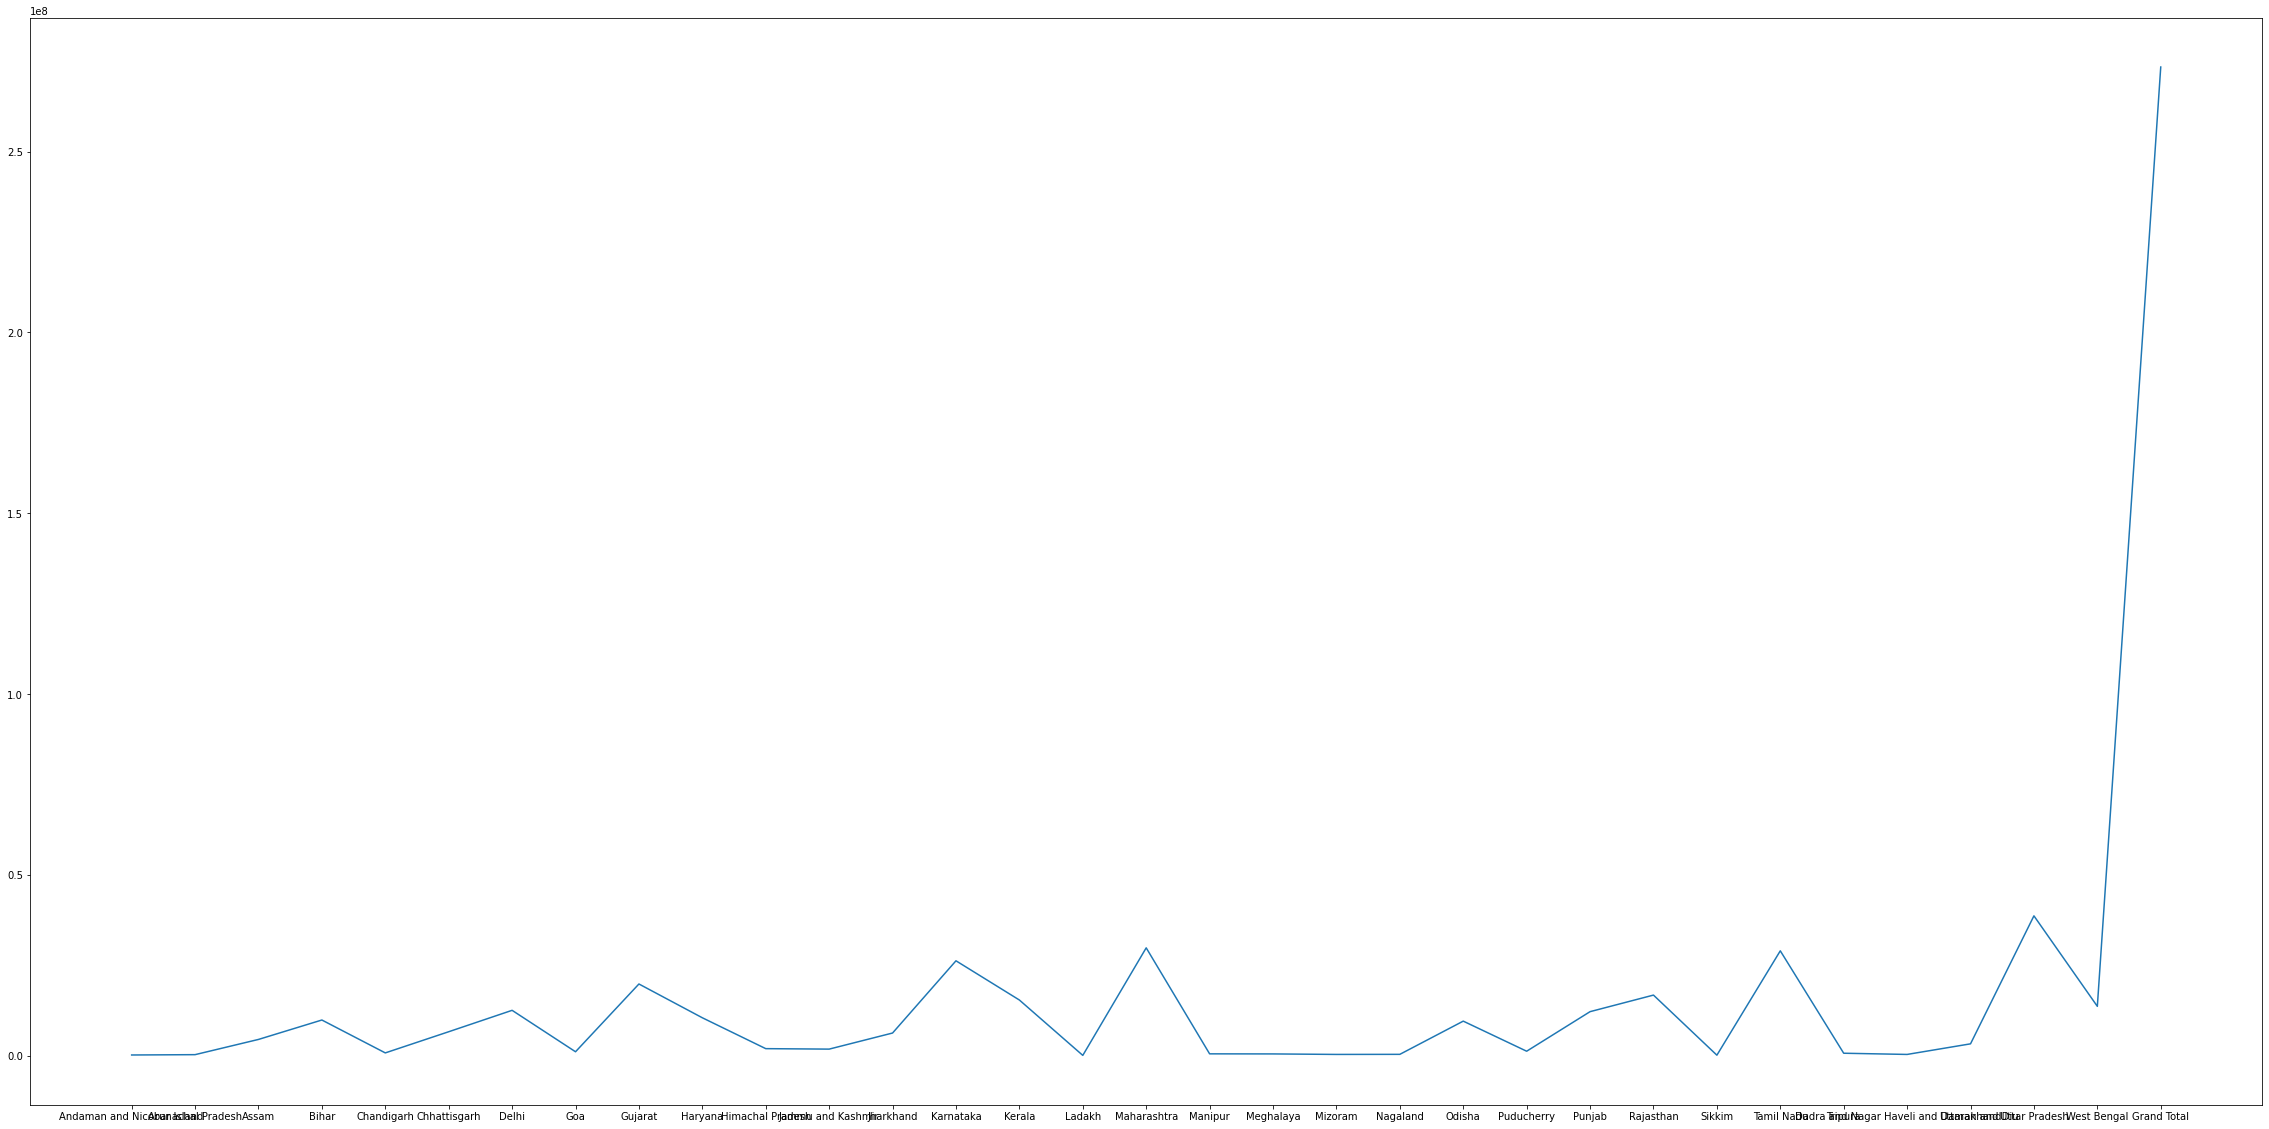

In [33]:
x = ev_data3['State/UT']
y = ev_data3['Total Number of active Vehicle as on 08.12.2021']
tickvalues = range(0,len(x))
plt.figure(figsize = (40,20))
plt.plot(x,y)

E:\Saurabh Decuments\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

E:\Saurabh Decuments\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

E:\Saurabh Decuments\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

E:\Saurabh Decuments\new\lib\site-pac

ValueError: num must be 1 <= num <= 6, not 7

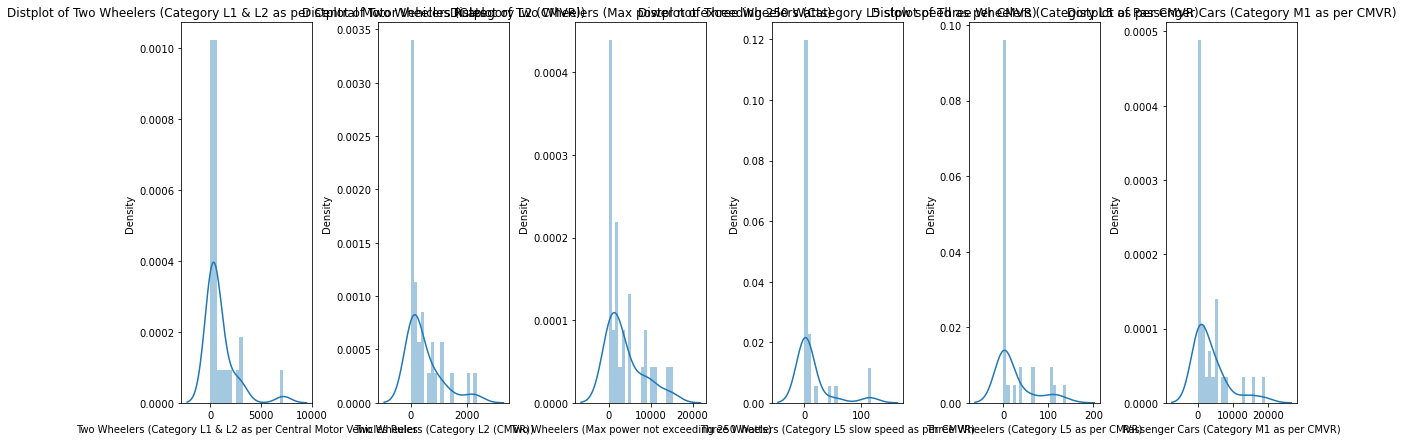

In [34]:
plt.figure(1, figsize=(20,7))
n=0
for x in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  n += 1
  plt.subplot(1,6,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(ev_data5[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

In [ ]:
for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
  ax=ev_data5.sort_values(y,ascending=True).tail(5).plot.barh(x='State',y=y)

# Analyed the Range of each EV- Brand 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

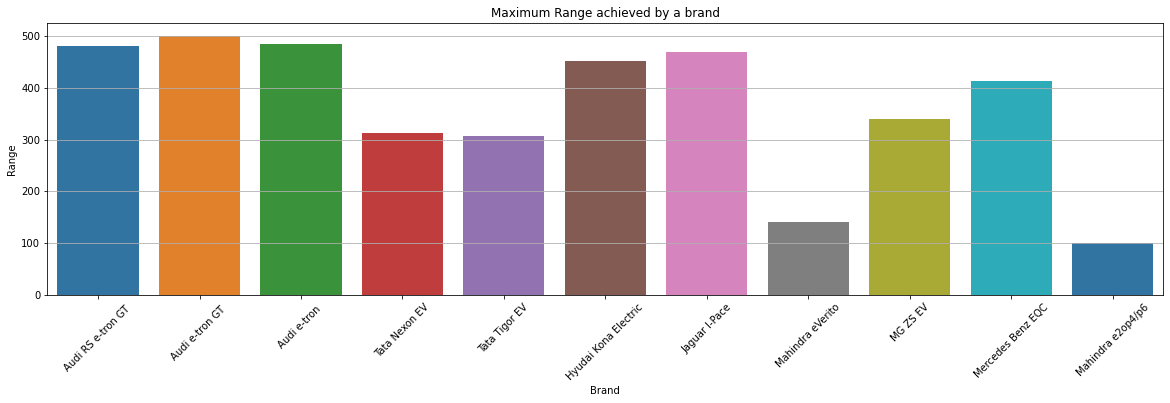

In [35]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand Name',y='Range(km)',data=ev_data2,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

# Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Audi RS e-tron GT '),
  Text(1, 0, 'Audi e-tron GT '),
  Text(2, 0, 'Audi e-tron '),
  Text(3, 0, 'Tata Nexon EV'),
  Text(4, 0, 'Tata Tigor EV'),
  Text(5, 0, 'Hyudai Kona Electric'),
  Text(6, 0, 'Jaguar I-Pace'),
  Text(7, 0, 'Mahindra eVerito'),
  Text(8, 0, 'MG ZS EV'),
  Text(9, 0, 'Mercedes Benz EQC'),
  Text(10, 0, 'Mahindra e2op4/p6')])

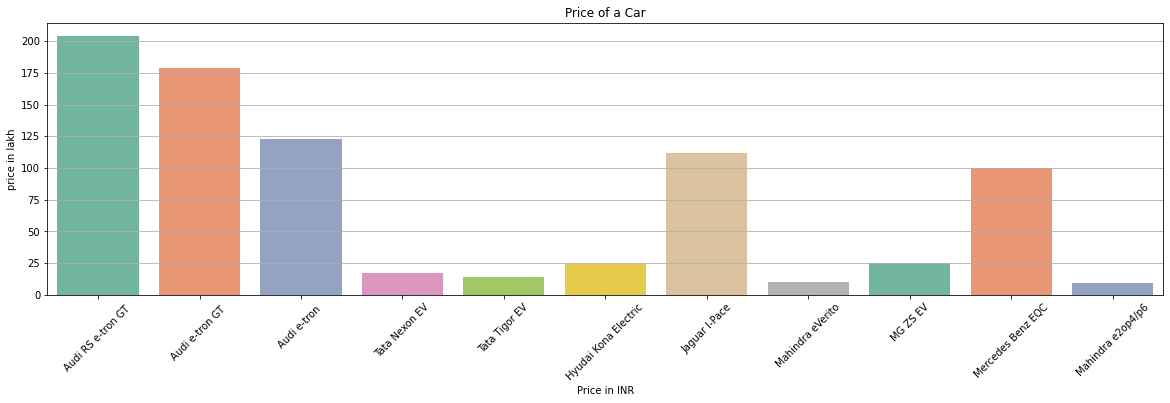

In [36]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand Name',y='Price(Lh)',data=ev_data2,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in INR')
plt.grid(axis='y')
plt.ylabel('price in lakh')
plt.xticks(rotation=45)

# Top speed  of cars

In [37]:
data3= ev_data2[["TopSpeed(km/h)", "Price(Lh)"]].groupby("TopSpeed(km/h)").count()
data4= ev_data2[["Range(km)", "Price(Lh)"]].groupby("Range(km)").count()
data5= ev_data2[["Range(km)", "TopSpeed(km/h)"]].groupby("Range(km)").count()
data5.head()

,TopSpeed(km/h)
Range(km),
100,1
140,1
306,1
312,1
340,1


In [38]:
data3=data3.sort_values("TopSpeed(km/h)",ascending = False).head(10)
data4=data4.sort_values("Range(km)",ascending = False).head(10)
data5=data5.sort_values("Range(km)",ascending = False).head(10)

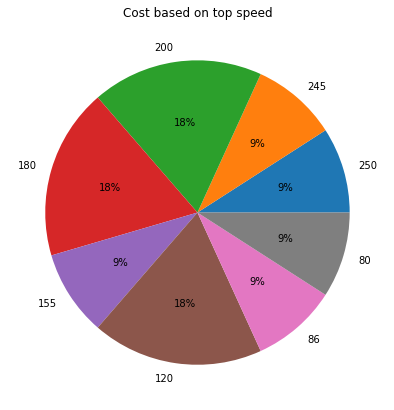

In [39]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=data3["Price(Lh)"],labels=data3.index,autopct='%1.0f%%')
plt.show()

# Regression for data

In [40]:
ev_data2['Drive Type'].replace(to_replace=['RWD','AWD','FWD'],value=[0, 2,1],inplace=True)
x=ev_data2[['Acceleration(sec)','Range(km)','TopSpeed(km/h)','Battery Capacity(kWh)', 'Charging T(h)','Max Power(kW)']]
y=ev_data2['Price(Lh)']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [42]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [43]:
r2=(r2_score(y_test,pred))
print(r2*100)

94.98422165177949


In [44]:
y1=ev_data2[['Charging T(h)']]
x1=ev_data2[['Price(Lh)']]

In [45]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=365)

In [46]:
log= LogisticRegression()
log.fit(X1_train, y1_train)
pred1 = log.predict(X1_test)
pred1

E:\Saurabh Decuments\new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

E:\Saurabh Decuments\new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([8, 9, 9], dtype=int64)

In [47]:
cm = confusion_matrix(y1_test, pred1)
cm

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]], dtype=int64)

In [48]:
X=ev_data2[['Battery Capacity(kWh)', 'Acceleration(sec)','TopSpeed(km/h)','Range(km)','Max Power(kW)','Max Torque(Nm)', 'No. of Seats','Charging T(h)']]
y=ev_data2['Price(Lh)']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=101)
lm=LinearRegression().fit(X_train,y_train)

In [50]:
print(lm.intercept_)

18.59041359957193


In [51]:
lm.coef_

array([-0.08543372, -0.0426334 , -0.14892378, -0.10157738,  0.36518417,
        0.10388335, -0.01239293, -0.05966203])

In [52]:
X_train.columns

Index(['Battery Capacity(kWh)', 'Acceleration(sec)', 'TopSpeed(km/h)',
       'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)', 'No. of Seats',
       'Charging T(h)'],
      dtype='object')

In [53]:
cdf=pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Battery Capacity(kWh),-0.085434
Acceleration(sec),-0.042633
TopSpeed(km/h),-0.148924
Range(km),-0.101577
Max Power(kW),0.365184
Max Torque(Nm),0.103883
No. of Seats,-0.012393
Charging T(h),-0.059662


In [54]:
predictions=lm.predict(X_test)
predictions

array([109.21786406,  37.22533409, 131.33143573,   4.31897078,
       192.69846888])

In [55]:
y_test

2    123
8     25
9    100
4     14
0    204
Name: Price(Lh), dtype: int64

E:\Saurabh Decuments\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Price(Lh)', ylabel='Density'>

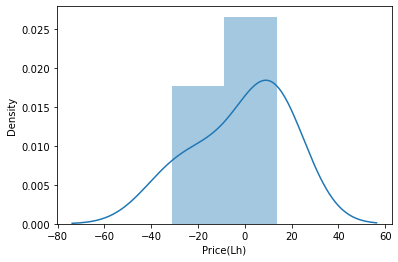

In [56]:
sns.distplot((y_test-predictions))

In [57]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))

MAE: 15.664293219639834
MSE: 308.5023723932867


In [58]:
metrics.mean_absolute_error(y_test,predictions)

15.664293219639834

In [59]:
metrics.mean_squared_error(y_test,predictions)

308.5023723932867

In [60]:
sum_of_col=ev_data3.sum(axis=0)
print(sum_of_col)

Sl. No.                                                      1234567891011121314151617181920212223242526272...
State/UT                                                     Andaman and Nicobar IslandArunachal PradeshAss...
Total Number of active Vehicle as on 08.12.2021                                                      546818820
Total number of active Electric Vehicles as on 08.12.2021                                              1754234
dtype: object
